# **IRONHACK_Sharks**

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import truncnorm
%matplotlib inline
warnings.filterwarnings('ignore')  
pd.set_option('display.max_columns', None)  
from src.shark_func import *

Proyecto de limpieza del archivo attacks.csv, que se puede localizar en el siguiente link https://www.kaggle.com/datasets/teajay/global-shark-attacks/download?datasetVersionNumber=7

In [2]:
# attacks.csv no está codificado en UTF-8, hay que especificar la codificación en la importación
sharks = pd.read_csv('../data/attacks.csv',encoding='ANSI')    

In [3]:
shape_origin = sharks.shape         # Guardamos el tamaño inicial del dataset
sharks.head(15)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris …,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


In [4]:
sharks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

Vamos a comprobar si tenemos filas duplicadas

In [5]:
sharks.duplicated().sum()

19411

Tenemos 19411 lineas duplicadas. Procedemos a eliminarlas. No aportan información alguna

In [6]:
sharks.drop_duplicates(inplace = True)
sharks.reset_index(drop=True,inplace=True)

In [7]:
sharks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6312 entries, 0 to 6311
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6310 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

In [8]:
sharks_info = cols_info(sharks)  # La función de cols_info(). Se puede encontrar en el archivo shark_func, ubicado en la carpeta src
                                 # Da información de los tipos de dato de cada columna    
sharks_info

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,2,6310,2,0,0,0,True,6288,99.62
Date,object,10,6302,10,0,0,0,True,5434,86.09
Year,float64,12,0,6312,0,0,0,False,250,3.96
Type,object,14,6298,14,0,0,0,True,9,0.14
Country,object,60,6252,60,0,0,0,True,213,3.37
Area,object,465,5847,465,0,0,0,True,826,13.09
Location,object,550,5762,550,0,0,0,True,4109,65.1
Activity,object,554,5758,554,0,0,0,True,1533,24.29
Name,object,220,6092,220,0,0,0,True,5231,82.87
Sex,object,575,5737,575,0,0,0,True,7,0.11


### PRIMERAS IMPRESIONES:

Solo quitando líneas duplicadas hemos reducido significativamente el tamaño del dataset. Pasando de 25000 registros a poco más de 6000

Vemos que todas las columnas tienen valores nulos, por lo que el tipo de dato de cada columna no nos aporta gran información de momento porque la presencia de nulos, hace que el tipo de la columna sea float o object (string)

* <ins>**Case Number</ins>:** identificación única del caso. Parece que están indentificadas con la fecha, y que están en orden decreciente. Vemos que los registros ocurridos en el mismo día, se ordenan con una letra al final para dotar el orden correctaemente

* <ins>**Date</ins>:** Fecha del registro, parece la misma que la columna 'Case Number'.

* <ins>**Year</ins>:** Año del suceso. Estas 3 columnas pueden darnos información valiosa a la hora de sustituir nulos, ya que la información de una la podamos aplicar a las otras. Veo que tenemos 250 valores únicos, de primeras esto parece extraño, ya que es bastante imporbable que tengamos registros de 250 años

* <ins>**Type</ins>:**  Tiene pinta que es tipo de ataque. Tendrá que ser una variable categórica ya que si asignamos un número a un ataque estaremos introduciendo un sesgo en los datos. Solo tiene 9 cateogorías únicas

* <ins>**Country</ins>:** País del ataque. Tiene 60 valores nulos, el resto string, lo qué es coherente. 213 valores únicos.

* <ins>**Area</ins>:** Area detro del pais (Estado/provincia/ciudad). Tiene 465 valores nulos, el resto string, lo qué es coherente. 826 valores únicos. De primeras parece una columna bastante complicada de formatear

* <ins>**Location</ins>:** Localización más precisa. Tiene 550 valores nulos, el resto string, lo qué es coherente. 4109 valores únicos. Columna compleja de formatear. Esta columna puede darnos información para completar información en Area y viceversa

* <ins>**Name</ins>:** Nombre de la víctima del ataque. Tiene 220 valores nulos, el resto string, lo qué es coherente. 5231 valores únicos. Esta columna seguramente la tengamos que rellenar tanto nulos como ocurrencias que se repiten (p.ej: male) con 'Unknown'. El nombre de la víctima no es relevante a la hora de haber sufrido un ataque

* <ins>**Sex</ins>:** Sexo de la víctima. Tiene 575 valores nulos, el resto string, lo qué es coherente. 7 valores únicos. Esto tenemos que transformarlo a 3 valores únicos ('Male','Female','Unknow')

* <ins>**Age</ins>:** Edad de la víctima. Tiene 2841 valores nulos (número miy elevado), el resto string, no es coherente deberían ser int o float. 158 valores únicos, son excesivos. El rango de edad de las victimas no puede ser tan alto, un número lógico sería 70 - 80 valores úncicos. 

* <ins>**Injury</ins>:** Tipo de lesión del ataque. Desde 'No injury', hasta 'Fatal'. Esta variable sería interesante pasarla a numérica, ya que el grado de lesión puede ser relevante. Hay que examinar la cantidad de grados de lesión que se pueden manejar. 38 valores nulos, el resto string, lo que es coherente. 3738 valores úncicos. Con los valores únicos parece que hay bastante trabajo para poder bajar su número

* <ins>**Fatal</ins>:** Relacionado con la columna anterior. Hemos visto que la columna injury en algunos registros se especifica 'Fatal', nos puede ayudar a gestionar los nulos de esta columna. 549 valores nulos, el resto string, es coherente. 9 valores únicos, debemos encontrar la forma de pasarlo a 3 'Fatal', 'No fatal', 'Unknown'.

* **Time:** Hora del ataque. 3364 nulos, más de la mitad. 367 valores únicos. Una buena forma de abordar esta columna, sería una clasificación categórica entre mañana / tarde / noche. Manejar valores de hora, puede generar imprecisión.

* <ins>**Time</ins>:** Hora del ataque. 3364 nulos, más de la mitad. 367 valores únicos. Una buena forma de abordar esta columna, sería una clasificación categórica entre mañana / tarde / noche. Manejar valores de hora, puede generar imprecisión.

* <ins>**Species</ins>:** Columna importante, la lógica nos dice que la especie de tiburón puede tener una correlaición alta si hay una ataque, si este es fatal o no. Gran número de nulos, casi la mitad. Mas de 1500 valores únicos, excesivos también ya que es improbable que haya tantas especies de tiburones. Debemos documentarnos para elegir la clasificacón de esta variable correctamente.

* <ins>**Investigator or Source</ins>:** Investigador o fuente de donde se han tomado los datos. Pocos valores nulos (27), 4970 valores únicos (demasiados pero coherente)

* <ins>**pdf</ins>:** Archivo .PDF donde se documenta el caso. Nos fijamos en que muchos de ellos la manera de nombrarlo sigue la siguiente estructura: id del case number + nombre del pdf. Nos puede resultar útil para completar los nulos de case number. Solo 10 nulos, 6392 valores únicos. 

* <ins>**href formula</ins>:** Tiene pinta que es la dirección web donde se aloja el pdf que documenta el caso. 11 nulos, y prácticamente todos valores únicos

* <ins>**href duplicada</ins>:** Parece que es la columna anterior duplicada, pero no coinciden los nulos 

* <ins>**Case number 1/2</ins>:** Caso pareceido al anterior. Parecen duplicadas pero con pequeñas variaciones en valores únicos y nulos. También parace que es copia de Case Number

* <ins>**original order</ins>:** Solo 3 nulos y el resto float. Parece algún tipo de ordenación ya que el número de valores únicos es casi el 100%

* <ins>**original order</ins>:** Solo 3 nulos y el resto float. Parece algún tipo de ordenación ya que el número de valores únicos es casi el 100%

* <ins>**Unnamed 22/23</ins>:** Columnas que por su nombre hacen indicar que lo más probables es que fueran creadas en la exportación del dataframe a .csv. Tienen entre las dos sólo 3 valores no nulos, todo hace pensar que no aportarán valor al dataset, pero las podremos usar para añadir más información que podamos encontrar útil.

### **1 - Eliminación de nulos**

Nuestro primer objetivo es que no haya ninguna columna con valores nulos. Se observa que todas las columnas tienen nulos. En algunas (Unnamed) prácticamente el 100%. Iremos analizando cada una, e iremos tomando decisiones para ir resolviendo los conflictos

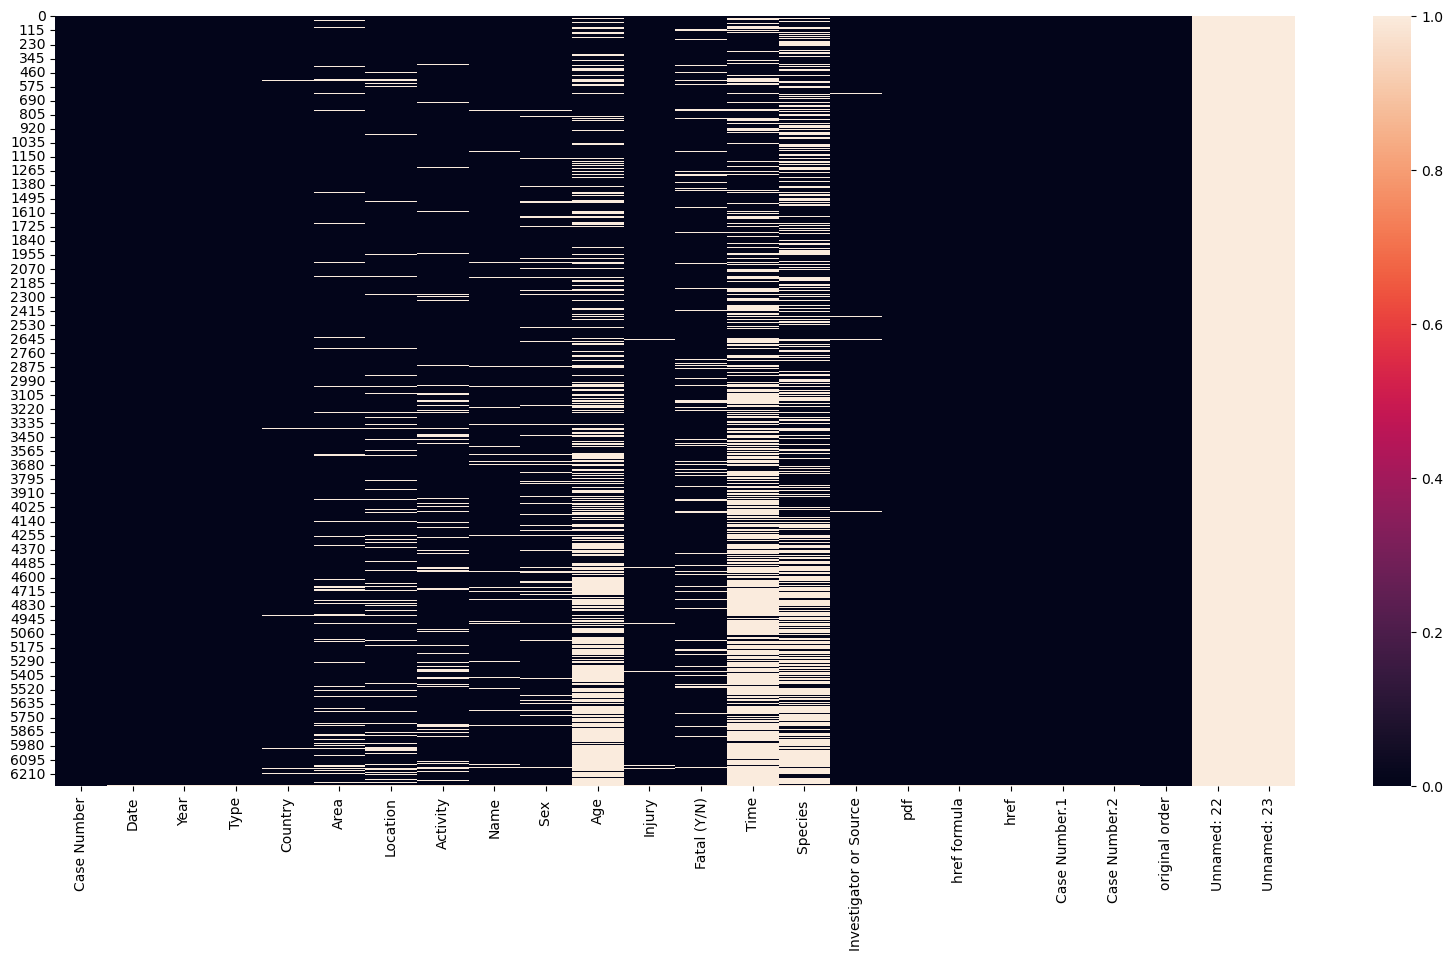

In [9]:
fig, ax = plt.subplots(figsize=(20,10));
sns.heatmap(sharks.isna());

In [10]:
# check_nan_cols() es una función que se encuentra en sharks_func, y nos permite ver de manera rápdia el nº de nulos por columna
check_nan_cols(sharks);

Case Number                  2
Date                        10
Year                        12
Type                        14
Country                     60
Area                       465
Location                   550
Activity                   554
Name                       220
Sex                        575
Age                       2841
Injury                      38
Fatal (Y/N)                549
Time                      3364
Species                   2848
Investigator or Source      27
pdf                         10
href formula                11
href                        10
Case Number.1               10
Case Number.2               10
original order               3
Unnamed: 22               6311
Unnamed: 23               6310
dtype: int64

En el gráfico anterior se puede intuir que hay un número elevado de registros con un gran número de nulos. Vamos a ver cuantas filas tenemos con un número de nulos mayor o igual que 20

In [11]:
# count_nan_rows() es una función que se encuentra en sharks_func, y nos permite saber los índeces de las filas que contienen un nº de nulos mayor o igual al indicado
nan_index = count_nan_row(sharks,n_nan=20)
sharks.loc[nan_index]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0,NaN,NaN
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0,NaN,NaN
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0,NaN,NaN
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0,NaN,NaN
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN,NaN
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6311,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se puede ver claramente que estas filas no aportan nada de valor. Procedemos a eliminarlas, y revisamos ahora las filas con un número de nulos mayor que 15

In [12]:
sharks.drop(index=nan_index,inplace=True)
sharks.reset_index(inplace=True,drop=True)

In [13]:
nan_index = count_nan_row(sharks,n_nan=15)
sharks.loc[nan_index]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23


No hay registros con un número mayor o igual a 15 nulos. Procedemos a evaluar las columnas

#### **1.1 - Columnas Unnamed**

In [14]:
# Hemos visto que solo hay 2 valores no nulos en Unnamed:23 y un valor no nulo en Unnamed:22

sharks[(sharks['Unnamed: 22'].notna()) | sharks['Unnamed: 23'].notna()]   # devuleve las filas en las que tengamos nulos en las columnas Unnamed 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,31,"No injury, shark bumped surfboard",N,16h00,NaN,R. Collier,2006.05.27-Desmond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.27,2006.05.27,4825.0,stopped here,NaN
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,NaN,"Buttock bitten, tissue removed",N,NaN,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,NaN,Teramo
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,NaN,Leg bitten by netted shark PROVOKED INCIDENT,N,NaN,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,NaN,change filename


Los valores no nulos que tenemos son: 'stopped here', 'Terrano' y 'change filename'. Información sin realción alguna con los ataques a tiburones. Vamos a optar añadir a estas dos columnas por 'Unknown'. Más adelante veremos si nos es conveniente usar estas columnas para albergar otra información que consideremos relevante


In [15]:
sharks[['Unnamed: 22', 'Unnamed: 23']] = ['Unknown','Unknown']

In [16]:
# Vuelvo a checkear duplicados en las filas

sharks.duplicated().sum()

0

In [17]:
check_nan_cols(sharks,);

Case Number                  1
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
href formula                 1
dtype: int64

Observamos que el número de nulos ha bajado, y que ya tenemos columnas sin valores nulos

#### 1.2 - **Columna original order**

Esta columna ya no tiene nulos pero nos interesa limpiarla para que nos ayude con otras columnas. Ya que parece que nos da información de orden de los registros

In [18]:
sharks['original order'].head(10)

0    6303.0
1    6302.0
2    6301.0
3    6300.0
4    6299.0
5    6298.0
6    6297.0
7    6296.0
8    6295.0
9    6294.0
Name: original order, dtype: float64

In [19]:
sharks['original order'].tail(10)

6292    11.0
6293    10.0
6294     9.0
6295     8.0
6296     7.0
6297     6.0
6298     5.0
6299     4.0
6300     3.0
6301     2.0
Name: original order, dtype: float64

In [20]:
sharks['original order'].value_counts()  # Columna de enteros en la que todos son valores únicos menos 569 que se repite 1 vez

569.0     2
6303.0    1
2106.0    1
2097.0    1
2098.0    1
         ..
4205.0    1
4206.0    1
4207.0    1
4208.0    1
2.0       1
Name: original order, Length: 6301, dtype: int64

In [21]:
sharks[sharks['original order']==569]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5733,1888.01.22,22-Jan-1888,1888.0,Boating,AUSTRALIA,New South Wales,Sydney Harbor,Rowing,Burke,M,NaN,"Shark bit boat, but no injury to occupant who ...",N,NaN,NaN,"Star, 1/23/1888",1888.01.22-Burke.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1888.01.22,1888.01.22,569.0,Unknown,Unknown
5734,1888.02.00,Feb-1888,1888.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Mzimvubu River mouth,Crossing the river mouth,male,M,NaN,FATAL,Y,NaN,NaN,"Cape Mercantile Advertiser, 2/15/1888, M. Levi...",1888.02.00-Mzimvubu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1888.02.00,1888.02.00,569.0,Unknown,Unknown


In [22]:
sharks['original order'].max() - sharks['original order'].min() 

6301.0

Esta columna representa el numero de ordenación original del dataset. Hemos llegado a la siguiente concluisión con estos datos:
* Vemos que registros consecutivos tienen numeros consecutivos en esta columna
* La diferencia entre el maximo y el minomo es de 6308, si le sumamos el valor repetido y los tres valores nulos suman 6312. La longitud de nuestro dataset
* SE LLAMA ORIGINAL ORDER!!!!!!

Como esta columna es unicamente para referenciar registros, vamos a ordenarla de 1 a 6302 que es el número total de registros que tenemos ahora mismo.

Vamos a comprbar que estón en orden decreciente y monótono, ya que lo que hemos visto en las tablas es lo que parece indicar

In [23]:
# Para comprobarlo tenemos que eliminar momentaneamente el indice repetido
index_569 = sharks[sharks['original order']==569].index
sharks.drop(index=index_569[0])['original order'].is_monotonic_decreasing

True

Debo intercambiar el orden de las filas para que el orden sea correcto. Ya que el registro más reciente tiene que tener un menor índice

In [24]:
row_copy = sharks.loc[index_569[0],:]
sharks.loc[index_569[0],:] = sharks.loc[index_569[1],:]
sharks.loc[index_569[1],:] = row_copy
sharks[sharks['original order']==569]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5733,1888.02.00,Feb-1888,1888.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Mzimvubu River mouth,Crossing the river mouth,male,M,NaN,FATAL,Y,NaN,NaN,"Cape Mercantile Advertiser, 2/15/1888, M. Levi...",1888.02.00-Mzimvubu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1888.02.00,1888.02.00,569.0,Unknown,Unknown
5734,1888.01.22,22-Jan-1888,1888.0,Boating,AUSTRALIA,New South Wales,Sydney Harbor,Rowing,Burke,M,NaN,"Shark bit boat, but no injury to occupant who ...",N,NaN,NaN,"Star, 1/23/1888",1888.01.22-Burke.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1888.01.22,1888.01.22,569.0,Unknown,Unknown


In [25]:
sharks['original order'] = range(0,sharks.shape[0])

In [26]:
sharks['original order'] = sharks['original order'].astype(np.int16)

In [27]:
cols_info(sharks)

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,1,6301,1,0,0,0,True,6286,99.75
Date,object,0,6302,0,0,0,0,True,5433,86.21
Year,float64,2,0,6302,0,0,0,False,250,3.97
Type,object,4,6298,4,0,0,0,True,9,0.14
Country,object,50,6252,50,0,0,0,True,213,3.38
Area,object,455,5847,455,0,0,0,True,826,13.11
Location,object,540,5762,540,0,0,0,True,4109,65.2
Activity,object,544,5758,544,0,0,0,True,1533,24.33
Name,object,210,6092,210,0,0,0,True,5231,83.01
Sex,object,565,5737,565,0,0,0,True,7,0.11


#### 1.3 - **Columnas Case Number  y Year**

In [28]:
check_nan_cols(sharks);

Case Number                  1
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
href formula                 1
dtype: int64

In [29]:
sharks[sharks.Year.isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,187,Unknown,Unknown
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,6079,Unknown,Unknown


In [30]:
# Puedo sacar el año con el case number
sharks.loc[sharks.Year.isna(),['Year']] = sharks.loc[sharks.Year.isna(),:]['Case Number'].apply(lambda x:x[0:4])
sharks.loc[[187,6079]]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
187,2017.01.08.R,Reported 08-Jan-2017,2017,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,187,Unknown,Unknown
6079,1836.08.19.R,Reported 19-Aug-1836,1836,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,6079,Unknown,Unknown


In [31]:
# Tengo que transformar Date a int, ya que todos son valores enteros
cols_info(sharks)

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,1,6301,1,0,0,0,True,6286,99.75
Date,object,0,6302,0,0,0,0,True,5433,86.21
Year,object,0,2,6300,0,0,0,False,251,3.98
Type,object,4,6298,4,0,0,0,True,9,0.14
Country,object,50,6252,50,0,0,0,True,213,3.38
Area,object,455,5847,455,0,0,0,True,826,13.11
Location,object,540,5762,540,0,0,0,True,4109,65.2
Activity,object,544,5758,544,0,0,0,True,1533,24.33
Name,object,210,6092,210,0,0,0,True,5231,83.01
Sex,object,565,5737,565,0,0,0,True,7,0.11


In [32]:
sharks.loc[:,'Year'] = sharks.Year.apply(int)
sharks['Year'] = sharks['Year'].astype(np.int16)

Tenemos 249 valores únicos. Parece un poco elevado, pero lo evaluaremos más tarde. Nos seguiremos centrando en los nulos

In [33]:
cols_info(sharks)

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,1,6301,1,0,0,0,True,6286,99.75
Date,object,0,6302,0,0,0,0,True,5433,86.21
Year,int16,0,0,0,6302,0,0,True,249,3.95
Type,object,4,6298,4,0,0,0,True,9,0.14
Country,object,50,6252,50,0,0,0,True,213,3.38
Area,object,455,5847,455,0,0,0,True,826,13.11
Location,object,540,5762,540,0,0,0,True,4109,65.2
Activity,object,544,5758,544,0,0,0,True,1533,24.33
Name,object,210,6092,210,0,0,0,True,5231,83.01
Sex,object,565,5737,565,0,0,0,True,7,0.11


In [34]:
sharks['Case Number']

0       2018.06.25
1       2018.06.18
2       2018.06.09
3       2018.06.08
4       2018.06.04
           ...    
6297       ND.0005
6298       ND.0004
6299       ND.0003
6300       ND.0002
6301       ND.0001
Name: Case Number, Length: 6302, dtype: object

In [35]:
sharks[sharks['Case Number'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5488,NaN,Reported 06-Sep-1905,1905,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,NaN,Lacerations to leg from hooked shark PROVOKED ...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,5488,Unknown,Unknown


In [36]:
# Compeletamos el nulo con la información de la fecha que nos da la columna Date
sharks['Case Number'].fillna('1905.09.06',inplace=True)

In [37]:
sharks[sharks['Case Number'].duplicated()].size

384

La columna de Case Number, debería contener valores únicos al 100% ya que es algo que indentifica el registro unitariamente. Vemos que la codificación no es fija. Para la identificación unitaria del caso ya tenemos la columna *original order* que ya hemos visto antes. Por lo que en esta columna no la trabajaremos más, ya que no aporta más valor que el de ayudarnos a rellenar nulos en otras columnas

#### 1.4 - **Columna Type**

In [38]:
sharks[sharks.Type.isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
85,2017.09.15.a,15-Sep-2017,2017,NaN,SAMOA,Upolu Island,Nofoali’i,Fishing,male,M,NaN,Injuries to hands and legs,N,Night,NaN,"Samoa Observer, 9/16/2017",2017.09.15.a-Samoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.a,2017.09.15.a,85,Unknown,Unknown
382,2015.07.27,27-Jul-2015,2015,NaN,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,40,Injury to hand,NaN,NaN,NaN,NaN,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,382,Unknown,Unknown
4867,1936.09.11.R,Reported 11-Sep-1936,1936,NaN,VIETNAM,NaN,Saigon,Wreck of a sampam,8 crew,M,NaN,FATAL,Y,NaN,NaN,"Lansing State Journal, 9/11/1936",1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.09.11.R,1936.09.11.R,4867,Unknown,Unknown
5705,1890.03.03.R,Reported 03-Mar-1890,1890,NaN,CEYLON,NaN,NaN,Diving,a pearl diver,M,NaN,FATAL,Y,NaN,NaN,"The Guardian, 3/3/1890",1890.03.03.R-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1890.03.03.R,1890.03.03.R,5705,Unknown,Unknown


In [39]:
sharks.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [40]:
sharks.Type.describe()

count           6298
unique             8
top       Unprovoked
freq            4595
Name: Type, dtype: object

Con esta columna procederemos de la siguiente manera:
* Los nulos los catalogaremos con la moda para no añadir un valor único más. No son muchos y la información del resto de columnas parece válida en un principio
* Evaluaremos el nº de ataques etiquetados como 'questionable'. Si no son elevados los eliminaremos ya que no queremos trabajar con datos cuya veracidad no está probada
* Boat, Boating, Boatmg los unificaremos en una única etiqueta denomindada Boat

In [41]:
sharks.Type.fillna('Unprovoked',inplace=True)
sharks.loc[sharks.Type.isin(['Boating','Boatomg']),'Type'] = 'Boat'

In [42]:
sharks[sharks.Type=='Questionable'] # Son solo dos registros. los borramos

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
16,2018.05.09,09-May-2018,2018,Questionable,AUSTRALIA,New South Wales,"Sharpes Beach, Ballina",Surfing,male,M,NaN,"No injury, surfboard damaged",N,10h30,Shark involvement not confirmed,"B. Myatt, GSAF",2018.05.09-SharpesBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.09,2018.05.09,16,Unknown,Unknown
20,2018.04.25.b,25-Apr-2018,2018,Questionable,AUSTRALIA,New South Wales,Lennox Head,Surfing,Matthew Lee,M,NaN,No injury,N,07h00,Questionable,"B. Myatt, GSAF",2018.04.25.b-Lee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.25.b,2018.04.25.b,20,Unknown,Unknown


In [43]:
index_type = sharks[sharks.Type=='Questionable'].index
sharks.drop(index=index_type,inplace=True)
sharks.reset_index(inplace=True,drop=True)

In [44]:
cols_info(sharks)

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,0,6300,0,0,0,0,True,6284,99.75
Date,object,0,6300,0,0,0,0,True,5432,86.22
Year,int16,0,0,0,6300,0,0,True,249,3.95
Type,object,0,6300,0,0,0,0,True,5,0.08
Country,object,50,6250,50,0,0,0,True,213,3.38
Area,object,455,5845,455,0,0,0,True,826,13.11
Location,object,540,5760,540,0,0,0,True,4109,65.22
Activity,object,544,5756,544,0,0,0,True,1533,24.33
Name,object,210,6090,210,0,0,0,True,5230,83.02
Sex,object,565,5735,565,0,0,0,True,7,0.11


#### 1.5 - **Columnas Investigator source y href formula**

In [45]:
sharks[sharks['Investigator or Source'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
117,2017.07.14.a,14-Jul-2017,2017,Unprovoked,AUSTRALIA,Western Australia,Floreat Beach,Surfing,male,M,NaN,"Minor injury, grazed by shark",N,11h45,NaN,NaN,2017.07.14.a-Floreat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.14.a,2017.07.14.a,119,Unknown,Unknown
288,2016.04.07.b,07-Apr-2016,2016,Unprovoked,USA,Florida,"Florida Keys, Monroe County",Fishing,Jonathan Lester,M,34,Left hand bitten,N,NaN,5' to 6' shark,NaN,2016.04.07.b-Lester.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.07.b,2016.04.07.b,290,Unknown,Unknown
380,2015.07.27,27-Jul-2015,2015,Unprovoked,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,40,Injury to hand,NaN,NaN,NaN,NaN,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,382,Unknown,Unknown
629,2013.08.31.b,31-Aug-2013,2013,Unprovoked,BAHAMAS,NaN,Freetown Beach,Spearfishing,Bryan Collins,M,NaN,Lower left leg bitten,N,NaN,Blacktip shark,NaN,2013.08.31.b-Collins.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.08.31.b,2013.08.31.b,631,Unknown,Unknown
1128,2009.04.28,28-Apr-2009,2009,Unprovoked,USA,Florida,"St. Augustine, St. John's County",NaN,Alicia,F,NaN,Multiple lacerations to right foot & ankle,N,16h45,NaN,NaN,2009.04.28-Alicia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2009.04.28,2009.04.28,1130,Unknown,Unknown
1240,2008.06.28.a,28-Jun-2008,2008,Unprovoked,SOUTH AFRICA,Western Cape Province,Mossel Bay,Surf skiing,Kobus Maritz,M,46,"No injury, ski bitten",N,14h00,"White shark, 2m",NaN,2008.06.28.a-Maritz.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.06.28.a,2008.06.28.a,1242,Unknown,Unknown
2123,1999.04.22,22-Apr-1999,1999,Unprovoked,MAURITIUS,Grand Baie,Pointe aux Canonniers,Swimming,Sylvia Lanner,F,41,Thigh bitten,N,06h00,"Grey reef shark, 1.5 m",NaN,1999.04.22-Lanner.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1999.04.22,1999.04.22,2125,Unknown,Unknown
2142,1999.00.00.a,1999,1999,Invalid,USA,Virginia,"Sandridge Beach, Virginia Beach, Princess Anne...",Body surfing,male,M,NaN,Abrasions,NaN,NaN,Shark involvement not confirmed,NaN,1999.00.00.a-NV-SandridgeBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1999.00.00.a,1999.00.00.a,2144,Unknown,Unknown
2458,1994.00.00.a,1994,1994,Unprovoked,USA,Florida,"Flagler Beach, Flagler County",Surfing,Jeff Weakley,M,NaN,Foot bitten,N,NaN,NaN,NaN,1994.00.00.a--JeffWeakley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1994.00.00.a,1994.00.00.a,2460,Unknown,Unknown
2646,1990.00.00,1990,1990,Unprovoked,USA,Florida,"Pensacola, Escambia County",Surfing,male,M,17,NaN,UNKNOWN,NaN,NaN,NaN,1990.00.00-NV-Pensacola.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1990.00.00,1990.00.00,2648,Unknown,Unknown


No nos vamos a complicar. La fuente de los datos nos sirve para dar veracidad o no al registro, no es nuestro objetivo. Además tenemos otras columnas que nos pueden dar esta información. No vamos a perder mucho el tiempo aquí. Todo lo que sea nulo lo catalogaremos como 'Unknown'

In [46]:
sharks['Investigator or Source'].fillna('Unknown',inplace=True)

In [47]:
sharks[sharks['href formula'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
3242,1975.01.19,19-Jan-1975,1975,Unprovoked,AUSTRALIA,South Australia,Coffin Bay,Surfing,David Barrowman,M,17,"FATAL, body not recovered",Y,NaN,NaN,"J. West; Adelaide Advertiser, 1/20/1975; P. Ke...",1975.01.19-Barrowman.pdf,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,1975.01.19,1975.01.19,3244,Unknown,Unknown


Misma situación, esto no aporta valor a los datos. Igualamos información con href

In [48]:
sharks.loc[sharks['href formula'].isna(),'href formula'] = sharks.loc[sharks['href formula'].isna(),'href']

In [49]:
check_nan_cols(sharks);

Country          50
Area            455
Location        540
Activity        544
Name            210
Sex             565
Age            2829
Injury           28
Fatal (Y/N)     539
Time           3354
Species        2838
dtype: int64

#### 1.6 - **Columnas Country / Area / Location**

In [50]:
sharks[sharks.Country.isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
60,2017.11.13.R,Reported 13-Nov-2017,2017,Unprovoked,NaN,NaN,NaN,Surfing,Timur Yunusov,M,24,Puncture wounds to feet,N,NaN,NaN,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.13.R,2017.11.13.R,62,Unknown,Unknown
523,2014.08.00,Aug-2014,2014,Invalid,NaN,NaN,NaN,Sea disaster,Cuban refugees,M,NaN,Shark involvement prior to death not confirmed,NaN,NaN,Shark involvement not confirmed,"Associated Press, 11/27/2014",2014.08.00-Cuban-refugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.00,2014.08.00,525,Unknown,Unknown
2954,1983.00.00.d,Ca. 1983,1983,Unprovoked,NaN,English Channel,NaN,Swimming,Padma Shri Taranath Narayan Shenoy,M,NaN,Left leg bitten,N,NaN,NaN,"Times of India, 2/5/2012",1983.00.00.d-Shenoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.00.00.d,1983.00.00.d,2956,Unknown,Unknown
3376,1970.11.00,Nov-1970,1970,Unprovoked,NaN,NaN,NaN,NaN,Heinz Plotsky,M,NaN,Extensive injuries,N,NaN,NaN,"H.D. Baldridge (1994), SAF Case #1645",1970.11.00-NV-Plotsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.11.00,1970.11.00,3378,Unknown,Unknown
3385,1970.08.02,02-Aug-1970,1970,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,NaN,"Sharks scavenged on bodies, but no record of t...",NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,3387,Unknown,Unknown
3386,1970.07.05,5-Jul-1970,1970,Unprovoked,NaN,NaN,NaN,NaN,male,M,NaN,Finger or toe severed,N,Night,Mako shark,"H.D. Baldridge (1994), SAF Case #1628",1970.07.05-NV-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.07.05,1970.07.05,3388,Unknown,Unknown
3393,1970.04.00.b,Apr-1970,1970,Provoked,NaN,NaN,NaN,Freediving,Lionel Jarvis,M,NaN,Arm abraded & lacerated. Recorded as PROVOKED ...,N,NaN,Wobbegong shark,"H.D. Baldridge (1994), SAF Case #1616",1970.04.00.b-NV-Jarvis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.04.00.b,1970.04.00.b,3395,Unknown,Unknown
3397,1970.02.05,5-Feb-1970,1970,Unprovoked,NaN,NaN,NaN,Wading,Sally Anne Irvine,F,8,Lacerations to lower leg,N,NaN,Carpet shark,H.D. Baldridge (1994) SAF Case #1626,1970.02.05-NV-Irvine.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.02.05,1970.02.05,3399,Unknown,Unknown
3423,1969.08.00,Aug-1969,1969,Unprovoked,NaN,NaN,NaN,NaN,Rodney Hughes,M,25,Am lacerated,N,NaN,NaN,H.D. Baldridge (1994) SAF Case #1602,1969.08.00-NV-Hughes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1969.08.00,1969.08.00,3425,Unknown,Unknown
3603,1965.10.21,21-Oct-1965,1965,Unprovoked,NaN,NaN,Florida Strait,The boat Caribou II sank,Mario Castellanos,M,39,Survived,N,NaN,NaN,"Lodi News Sentinel, 10/30/1965",1965.10.21-Castellanos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1965.10.21,1965.10.21,3605,Unknown,Unknown


Vamos a ver si sacamos información de otras columnas

In [51]:
sharks[sharks.Country.isna() & ((sharks.Area.notna())|(sharks.Location.notna()))]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
2954,1983.00.00.d,Ca. 1983,1983,Unprovoked,NaN,English Channel,NaN,Swimming,Padma Shri Taranath Narayan Shenoy,M,NaN,Left leg bitten,N,NaN,NaN,"Times of India, 2/5/2012",1983.00.00.d-Shenoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.00.00.d,1983.00.00.d,2956,Unknown,Unknown
3385,1970.08.02,02-Aug-1970,1970,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,NaN,"Sharks scavenged on bodies, but no record of t...",NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,3387,Unknown,Unknown
3603,1965.10.21,21-Oct-1965,1965,Unprovoked,NaN,NaN,Florida Strait,The boat Caribou II sank,Mario Castellanos,M,39,Survived,N,NaN,NaN,"Lodi News Sentinel, 10/30/1965",1965.10.21-Castellanos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1965.10.21,1965.10.21,3605,Unknown,Unknown
4016,1960.01.26,26-Jan-1960,1960,Sea Disaster,NaN,"Between Timor & Darwin, Australia",NaN,Portuguese Airliner with 9 people aboard went ...,NaN,NaN,NaN,"As searchers approached wreckage, sharks circl...",N,NaN,NaN,"V.M. Coppleson (1962), p.260",1960.01.26-Portuguese airliner.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1960.01.26,1960.01.26,4018,Unknown,Unknown
4229,1956.09.13,13-Sep-1956,1956,Unprovoked,NaN,Near the Andaman & Nicobar Islands,NaN,Climbing back on ship,male,M,NaN,FATAL,Y,P.M.,Blue shark,M. Hosina,1956.09.13-TunaBoat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1956.09.13,1956.09.13,4231,Unknown,Unknown
4264,1956.00.00.g,1956,1956,Sea Disaster,NaN,Between Comores & Madagascar,Geyser Bank,Shipwreck,"Captain Eric Hunt, the cook & a French passenger",M,NaN,FATAL,Y,NaN,NaN,dinofish.com,1956.00.00.g-Capt-Hunt.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1956.00.00.g,1956.00.00.g,4266,Unknown,Unknown
4496,1949.12.00.b,Dec-1949,1949,Sea Disaster,NaN,Caribbean Sea,Between Cuba & Costa Rica,"Sea Disaster, sinking of the motorship Wingate","Albert Battles, James Dean & 4 crew",M,NaN,Fatal or drowning or scavenging,Y,NaN,Shark involvement not confirmed,"Canberra Times, 1/6/1950",1949.12.00.b-Wingate.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1949.12.00.b,1949.12.00.b,4498,Unknown,Unknown
4637,1944.10.24,24-Oct-1944,1944,Sea Disaster,NaN,NaN,225 miles east of Hong Kong,Japanese POW ship Arisan Maru with 1800 Americ...,NaN,M,NaN,Most of the men drowned & some were taken by s...,Y,>17h30,NaN,internet (multiple),1944.10.24-ArisanMaru.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1944.10.24,1944.10.24,4639,Unknown,Unknown
4698,1942.11.00.a,Nov-1942,1942,Sea Disaster,NaN,Off South American coast,NaN,Dutch merchant ship Zaandam torpedoed by the ...,NaN,M,NaN,FATAL,Y,NaN,NaN,"M. Murphy; V.M. Coppleson (1962), pp.207-208",1942.11.00.a-Izzi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1942.11.00.a,1942.11.00.a,4700,Unknown,Unknown
4710,1942.06.00,Jun-1942,1942,Unprovoked,NaN,300 miles east of St. Thomas (Virgin Islands),NaN,On life raft tethered to lifeboat. A seaman pu...,male,M,NaN,Forearm lacerated,N,NaN,NaN,"V.M. Coppleson (1962), p.258",1942.06.00-on-life-raft.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreads

Para sacar una información fiable tendríamos que evaluar una por uno los registros. La ubicación del ataque es una variable a tener en cuenta, ya que puede influir en una probabilidad de que este suceda. Teniendo en cuenta esto, procederemos de la siguiente manera:



* Evaluaremos que registros tienen estos 3 campos nulos, si no son muchos los eliminaremsos ya que no nos darán información,
* El resto de nulos que nos queden lo dejaremos como 'Unknown', ya que si necesitamos tendremos al menos la inforamción de alguno de los otros campos. Y en caso de ser necesario, se podría completar la información.

In [52]:
sharks[sharks.Country.isna() & (sharks.Area.isna()) & (sharks.Location.isna())].size 
# No podemos deshacernos de estos registros, tendríamos menos de 6000 registros, que es el mínimo marcado

696

In [53]:
# Rellenamos todo con 'Unknown'
sharks['Country'].fillna('UNKNOWN',inplace=True)
sharks['Location'].fillna('Unknown',inplace=True)
sharks['Area'].fillna('Unknown',inplace=True)

In [54]:
sharks.Country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'UNKNOWN', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 

In [55]:
sharks.Country.describe()

count     6300
unique     213
top        USA
freq      2229
Name: Country, dtype: object

In [56]:
sharks.Country.value_counts()[sharks.Country.value_counts() > 10]

USA                     2229
AUSTRALIA               1336
SOUTH AFRICA             579
PAPUA NEW GUINEA         134
NEW ZEALAND              128
BRAZIL                   112
BAHAMAS                  109
MEXICO                    89
ITALY                     71
FIJI                      62
PHILIPPINES               61
REUNION                   60
NEW CALEDONIA             53
UNKNOWN                   50
CUBA                      46
MOZAMBIQUE                45
SPAIN                     44
INDIA                     40
EGYPT                     38
CROATIA                   34
JAPAN                     34
PANAMA                    32
SOLOMON ISLANDS           30
IRAN                      29
JAMAICA                   27
FRENCH POLYNESIA          25
GREECE                    25
HONG KONG                 24
ENGLAND                   23
INDONESIA                 23
PACIFIC OCEAN             17
ATLANTIC OCEAN            17
COSTA RICA                17
BERMUDA                   16
VIETNAM       

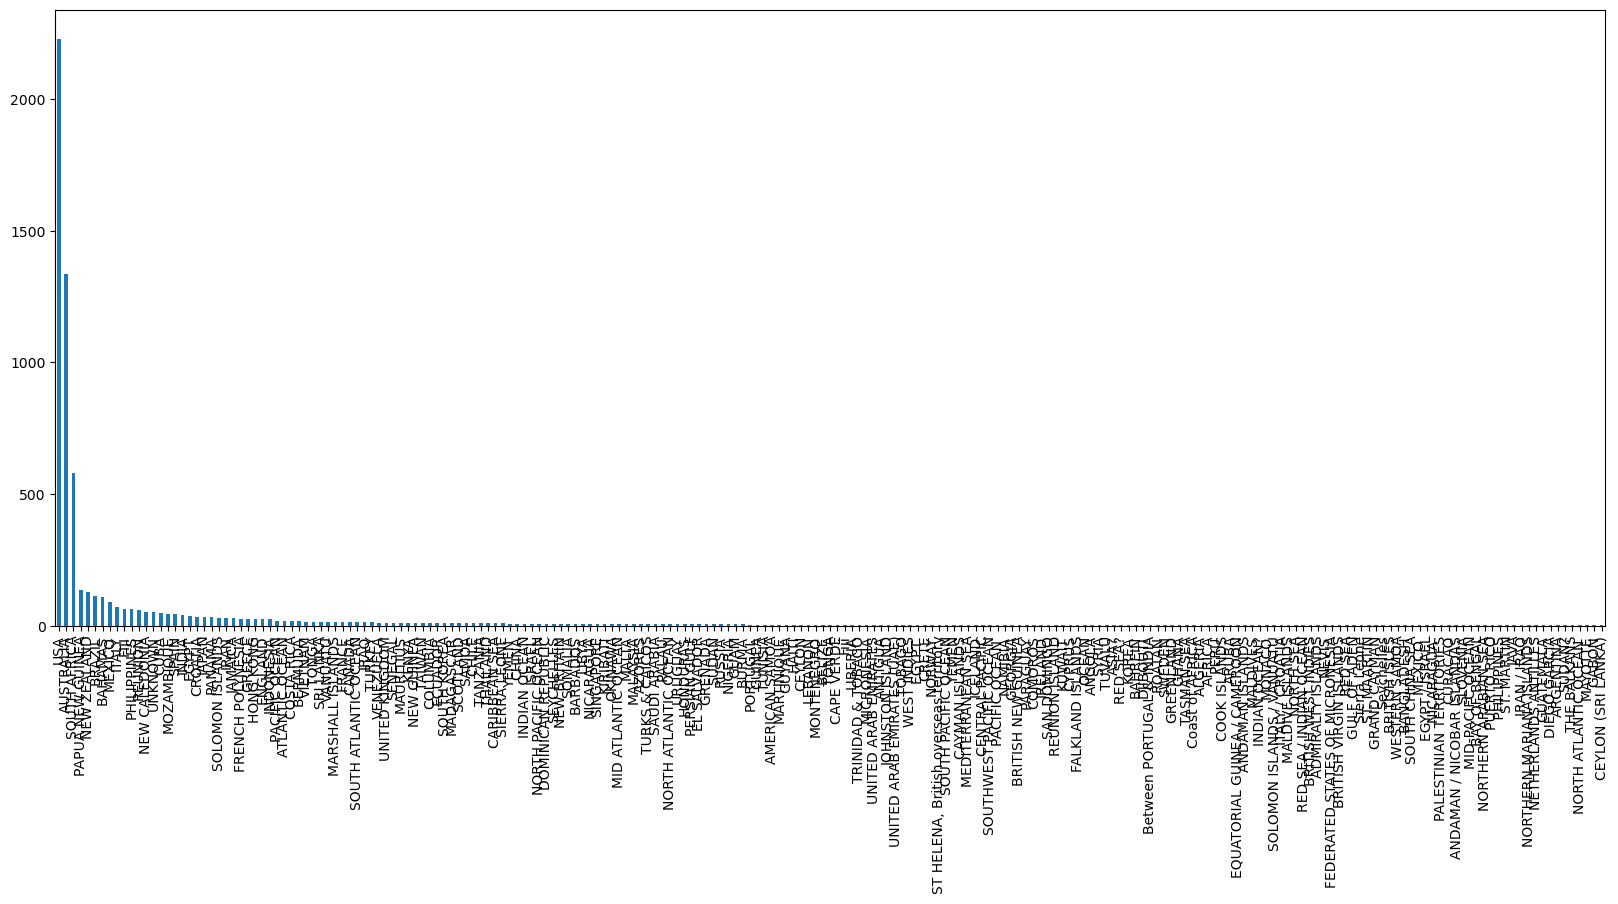

In [57]:
sharks.Country.value_counts().plot(kind='bar',figsize =(20,8));

Podemos ver que más del 50% de los ataques se producen en USA, o en zonas del índico sur o pacífico sur. Para poder trabajar con los datos, vamos a establecer un corte en "paises" cuyo conteo de ataques sea menor que 20. Si es así calificaremos el país como 'Other', para indicar que el ataque ha sucedido en otro lugar fuera de los más frecuentes.

In [58]:
index_country = sharks.Country.value_counts()[sharks.Country.value_counts() < 20].index
sharks.loc[sharks.Country.isin(index_country),'Country'] = 'OTHER'

In [59]:
sharks.Country.value_counts()

USA                 2229
AUSTRALIA           1336
OTHER                708
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 71
FIJI                  62
PHILIPPINES           61
REUNION               60
NEW CALEDONIA         53
UNKNOWN               50
CUBA                  46
MOZAMBIQUE            45
SPAIN                 44
INDIA                 40
EGYPT                 38
JAPAN                 34
CROATIA               34
PANAMA                32
SOLOMON ISLANDS       30
IRAN                  29
JAMAICA               27
FRENCH POLYNESIA      25
GREECE                25
HONG KONG             24
INDONESIA             23
ENGLAND               23
Name: Country, dtype: int64

In [60]:
cols_info(sharks)

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,0,6300,0,0,0,0,True,6284,99.75
Date,object,0,6300,0,0,0,0,True,5432,86.22
Year,int16,0,0,0,6300,0,0,True,249,3.95
Type,object,0,6300,0,0,0,0,True,5,0.08
Country,object,0,6300,0,0,0,0,True,31,0.49
Area,object,0,6300,0,0,0,0,True,826,13.11
Location,object,0,6300,0,0,0,0,True,4109,65.22
Activity,object,544,5756,544,0,0,0,True,1533,24.33
Name,object,210,6090,210,0,0,0,True,5230,83.02
Sex,object,565,5735,565,0,0,0,True,7,0.11


#### 1.7 - **Columnas Injury / Fatal**

In [61]:
sharks[['Injury','Fatal (Y/N)']][sharks.Injury.isna()]

,Injury,Fatal (Y/N)
1268,NaN,UNKNOWN
1364,NaN,NaN
2248,NaN,UNKNOWN
2265,NaN,UNKNOWN
2646,NaN,UNKNOWN
3036,NaN,UNKNOWN
3205,NaN,NaN
3296,NaN,UNKNOWN
3432,NaN,UNKNOWN
3455,NaN,NaN


In [62]:
sharks[['Injury','Fatal (Y/N)']][sharks['Fatal (Y/N)'].isna()]

,Injury,Fatal (Y/N)
25,"Multiple severe injuries to arms and leg, leg ...",NaN
74,FATAL,NaN
77,"Lacerations to right ankle, foot & toe",NaN
82,"FATAL, but death was probably due to drowning",NaN
96,Lacerations to left foot,NaN
...,...,...
6145,Lacerations to arm & leg,NaN
6155,"Partial hominid remains recovered from shark, ...",NaN
6156,Struck on thigh,NaN
6162,FATAL,NaN


In [63]:
sharks['Fatal (Y/N)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

Vamos a proceder de la siguiente manera:
* Los 28 valores nulos que tenemos en 'Injury' los vamos a sustituir por 'Unknown'
* Después examinaremos los nulos a ver si podemos sacar más información
* Aplicaremos una función para agrupar todos los valores únicos de Fatal

In [64]:
# La función gropu_fatal se recoge de sharks_func. Se usa para agrupar los valores 'Y' y 'N' de distintos formatos
sharks.Injury.fillna('Unknown',inplace=True)
sharks['Fatal (Y/N)'] = sharks['Fatal (Y/N)'].apply(group_fatal)

In [65]:
sharks[sharks['Fatal (Y/N)']=='M']   # Vemos que es un error en la entrada de datos. Se ha puesto el valor de Sex en Fatal. Observando la descripción de Injury, vemos que no es Fatal

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
283,2016.04.18.b,18-Apr-2016,2016,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,Hoata Iotua,M,22,Laceration to knee by speared shark PROVOKED I...,M,Morning,"Grey reef shark, 2 m","TNTV News, 4/19/2016",2016.04.18.b-Iotua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.18.b,2016.04.18.b,285,Unknown,Unknown


In [66]:
sharks.loc[sharks['Fatal (Y/N)']=='M','Fatal (Y/N)'] = 'N'

In [67]:
sharks[sharks['Fatal (Y/N)']=='2017']  # Otra entrada no correcta de datos. No es Fatal  

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
784,2012.06.10,10-Jun-2012,2012,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,M,57,Lower left leg injured PROVOKED ACCIDENT,2017,Morning,"Blue shark, 2.5m","D. Puddo, 6/11/2012",2012.06.10-Zara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.10,2012.06.10,786,Unknown,Unknown


In [68]:
sharks.loc[sharks['Fatal (Y/N)']=='2017','Fatal (Y/N)'] = 'N'

In [69]:
sharks[['Injury','Fatal (Y/N)']][(sharks['Fatal (Y/N)'].isna())&(sharks.Injury=='FATAL')]

,Injury,Fatal (Y/N)
74,FATAL,NaN
872,FATAL,NaN
2228,FATAL,NaN
2658,FATAL,NaN
2672,FATAL,NaN
2789,FATAL,NaN
2951,FATAL,NaN
3809,FATAL,NaN
4778,FATAL,NaN
5194,FATAL,NaN


In [70]:
sharks.loc[(sharks['Fatal (Y/N)'].isna())&(sharks.Injury=='FATAL'),'Fatal (Y/N)'] = 'Y'

In [71]:
sharks[['Injury','Fatal (Y/N)']][(sharks['Fatal (Y/N)'].isna())&(sharks.Injury.str.contains('fatal|Fatal|FATAL'))]

,Injury,Fatal (Y/N)
82,"FATAL, but death was probably due to drowning",NaN
157,"Fatal, coroner unable to determine if the dive...",NaN
435,"FATAL, but shark involvement prior to death un...",NaN
1493,"FATAL, but shark involvement prior to death un...",NaN
1561,"FATAL, shark involvement prior to death is unc...",NaN
1877,"PRESUMED FATAL, body not recovered",NaN
1945,Fatal or drowned & remains scavenged by shark,NaN
2023,Non-fatal,NaN
2888,"FATAL, but shark involvement prior to death co...",NaN
2895,Forced at gunpoint to jump overboard. Presume...,NaN


Vemos en la tabla anterior que no podemos sacar información concluyente, hay algunos casos que se supone que han sido fatal. Otros que no se puede confirmar la presencia de tiburones. Pero podemos dar valores a algunos nulos

In [72]:
sharks.loc[((sharks.Injury)=='Non-fatal')&(sharks['Fatal (Y/N)'].isna()),'Fatal (Y/N)'] = 'N'  # Non-fatal en la descripción de Injury
sharks.loc[5823,'Injury'] = 'Y'  # injury == 'FATAL '

El resto de nulos los vamos a borrar (solo los que tengan fatal en el campo Injury), porque no tenemos certeza que sean ataques de tiburón. Muchos son ahogamientos que presumiblimente luego les mordió un tiburón

In [73]:
index_fatal = sharks[['Injury','Fatal (Y/N)']][(sharks['Fatal (Y/N)'].isna())&(sharks.Injury.str.contains('fatal|Fatal|FATAL'))].index
sharks.drop(index=index_fatal,inplace=True)
sharks.reset_index(inplace=True,drop=True)

In [74]:
sharks[['Injury','Fatal (Y/N)']][sharks['Fatal (Y/N)'].isna()]

,Injury,Fatal (Y/N)
25,"Multiple severe injuries to arms and leg, leg ...",NaN
77,"Lacerations to right ankle, foot & toe",NaN
95,Lacerations to left foot,NaN
104,Abrasions and cuts to sole of foot,NaN
112,Foot injured,NaN
...,...,...
6094,human remains (male) found in shark’s gut,NaN
6115,Lacerations to arm & leg,NaN
6125,"Partial hominid remains recovered from shark, ...",NaN
6126,Struck on thigh,NaN


Son demasiados registros para examinar, y se tendrían que hacer de 1 en 1 para obtener toda la información. Vamos a clasificar el resto de nulos como 'Unknown'

In [75]:
sharks['Fatal (Y/N)'].fillna('Unknown',inplace=True)

In [76]:
cols_info(sharks)

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,0,6270,0,0,0,0,True,6254,99.74
Date,object,0,6270,0,0,0,0,True,5408,86.25
Year,int16,0,0,0,6270,0,0,True,249,3.97
Type,object,0,6270,0,0,0,0,True,5,0.08
Country,object,0,6270,0,0,0,0,True,31,0.49
Area,object,0,6270,0,0,0,0,True,825,13.16
Location,object,0,6270,0,0,0,0,True,4091,65.25
Activity,object,539,5731,539,0,0,0,True,1525,24.32
Name,object,210,6060,210,0,0,0,True,5201,82.95
Sex,object,562,5708,562,0,0,0,True,7,0.11


#### **1.8 - Columnas Sex / Name**

In [77]:
sharks.rename(columns={'Sex ':'Sex'},inplace=True);    # La columna Sex estaba mal formateada 'Sex '

In [78]:
sharks.Sex.unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [79]:
sharks.Sex = sharks.Sex.apply(group_sex)    # Función group_sex() funciona de manera similar a goup_fatal

In [80]:
sharks[sharks.Sex == 'lli']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1617,2004.11.11.b,11-Nov-2004,2004,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh",N,13h30,5.5 m [18'] white shark,"R. Collier, GSAF",2004.11.11.b-Kang.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.11.11.b,2004.11.11.b,1624,Unknown,Unknown


In [81]:
sharks.loc[sharks.Sex == 'lli','Sex'] = 'M' # Nombre Brian podemos pasar a 'M'

In [82]:
sharks[sharks.Sex == '.']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5412,1908.06.02.R,Reported 02-Jun-1908,1908,Sea Disaster,PAPUA NEW GUINEA,New Britain,Matupi,.,NaN,.,NaN,"Remains of 3 humans recovered from shark, but ...",Y,NaN,Allegedly a 33-foot shark,"Taranaki Herald, 6/2/1908",1908.06.02.R-Matupi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1908.06.02.R,1908.06.02.R,5437,Unknown,Unknown


In [83]:
sharks[sharks.Sex == 'N']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4917,1934.07.11,11-Jul-1934,1934,Boat,AUSTRALIA,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,NaN,No injury to occupants Sharks continually foll...,N,NaN,"Blue pointer, 11'","G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ...",1934.07.11-Newton-boat-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1934.07.11,1934.07.11,4938,Unknown,Unknown
6099,1801.12.18.R,Reported 18-Dec-1801,1801,Provoked,UNKNOWN,Unknown,Unknown,Standing on landed shark's tail,Stephen Pettigew,N,NaN,"FATAL, PROVOKED INCIDENT",Y,NaN,12' shark,"The Evening Post, 12/18/1801",1801.12.18.R-Pettigrew.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1801.12.18.R,1801.12.18.R,6131,Unknown,Unknown


In [84]:
sharks.loc[6099,'Sex']='M' # Stephen lo podemos pasar a 'M'
sharks.loc[sharks.Sex == '.','Sex'] = np.nan 
sharks.loc[sharks.Sex == 'N','Sex'] = np.nan

In [85]:
# porcentaje de Male
per_male = sharks.Sex[sharks.Sex == 'M'].size / sharks.Sex[(sharks.Sex == 'M')|(sharks.Sex == 'F')].size *100
per_male

88.87136347704171

Vamos a proceder de la siguiente manera:
- El campo sex puede ser importante y tener influencia a la hora de recibir un ataque o a sobrevivir al mismo. El número de nulos que tenemos es alto 562. En vez de rellenar con 'Unknown', vamos a optar por rellenar aleatorimanente el 89% de nulos con 'M' y el 11% restante con 'F'. Así nos aeguramos tener sólo dos valores únicos que es lo deseado, y que estos se distribuyan según la muestra
- El campo nombre con nulos lo rellenaremos con 'Unknown', ya que el nombre de una persona no afecta a la hora de recibir un ataque, sobrevivir, etc...

In [86]:
# Mezclamos aleatoriamente los índices donde hay nulos
index_sex = sharks.Sex[sharks.Sex.isna()].index
index_shuffle = index_sex.values
np.random.shuffle(index_shuffle)
index_sex = pd.Series(index_shuffle)

# Establecemos el corte del 89%
index_89 = int(index_sex.size*per_male)

# Rellenamos el 89 % de los nulos con 'M'
sharks.loc[index_sex[:index_89],'Sex'] = 'M'
sharks.Sex.fillna('F',inplace=True)

In [87]:
sharks.Name.fillna('Unknown',inplace=True)

In [88]:
sharks.Sex.unique()

array(['F', 'M'], dtype=object)

#### **1.9 - Age**

In [89]:
cols_info(sharks)

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,0,6270,0,0,0,0,True,6254,99.74
Date,object,0,6270,0,0,0,0,True,5408,86.25
Year,int16,0,0,0,6270,0,0,True,249,3.97
Type,object,0,6270,0,0,0,0,True,5,0.08
Country,object,0,6270,0,0,0,0,True,31,0.49
Area,object,0,6270,0,0,0,0,True,825,13.16
Location,object,0,6270,0,0,0,0,True,4091,65.25
Activity,object,539,5731,539,0,0,0,True,1525,24.32
Name,object,0,6270,0,0,0,0,True,5200,82.93
Sex,object,0,6270,0,0,0,0,True,2,0.03


In [90]:
sharks.Age.unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '51', '39', '58', 'Teen', '47',
       '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6', '27',
       '64', '23', '71', '44', '62', '68', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

Aplicamos función *age_str_to_string()*, para convertir todo lo que se pueda a int

In [91]:
sharks['Age'] = sharks.Age.apply(age_str_to_string)

In [92]:
cols_info(sharks)  # Hesmo reducido considerablemente el número de strings

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,0,6270,0,0,0,0,True,6254,99.74
Date,object,0,6270,0,0,0,0,True,5408,86.25
Year,int16,0,0,0,6270,0,0,True,249,3.97
Type,object,0,6270,0,0,0,0,True,5,0.08
Country,object,0,6270,0,0,0,0,True,31,0.49
Area,object,0,6270,0,0,0,0,True,825,13.16
Location,object,0,6270,0,0,0,0,True,4091,65.25
Activity,object,539,5731,539,0,0,0,True,1525,24.32
Name,object,0,6270,0,0,0,0,True,5200,82.93
Sex,object,0,6270,0,0,0,0,True,2,0.03


In [93]:
index_age = []
for e in sharks.Age.iteritems():
    if type(e[1]) == str:
        index_age.append(e[0])
sharks.loc[index_age]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
46,2018.01.21,21-Jan-2018,2018,Unprovoked,NEW CALEDONIA,Unknown,Nouville,Spearfishing,male,M,40s,Injuries to abdomen and arm,N,15h30,"Bull shark, 3 m",TrackingSharks.com,2018.01.21-NewCaledonia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.01.21,2018.01.21,48,Unknown,Unknown
147,2017.04.27,27-Apr-2017,2017,Unprovoked,NEW ZEALAND,South Island,"Porpoise Bay, Catlins",Body boarding,female,F,20s,Puncture wounds & laceration above knee,N,14h00,NaN,"C.Black, GSAF",2017.04.27-NZ.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.27,2017.04.27,150,Unknown,Unknown
178,2017.01.22,22-Jan-2017,2017,Unprovoked,USA,Florida,"Vero Beach, Indian River County",NaN,male,M,Teen,Puncture wounds to lower arm or hand,N,14h00,NaN,"TCPalm, 1/22/2017",2017.01.22-VeroBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.22,2017.01.22,182,Unknown,Unknown
190,2016.12.11.b,11-Dec-2016,2016,Unprovoked,FRENCH POLYNESIA,Tuamotos,Takapoto Atoll,Fishing,male,M,40s,Hand injured?,N,NaN,NaN,"Tahiti Info, 12/12/2016",2015.12.11.b-Takapoto.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.12.11.b,2016.12.11.b,194,Unknown,Unknown
215,2016.09.11,11-Sep-2016,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,male,M,60s,Minor injury to arm,N,15h15,3' to 4' shark,"News4Jax, 9/11/2016",2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.11,2016.09.11,219,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5518,1901.09.23.R,Reported 23-Sep-1901,1901,Unprovoked,OTHER,Southern Cyprus,Larnaca,Swimming,male,M,Teen,"FATAL, bitten on arms, chest & legs",Y,NaN,2 m shark,"Bardanis citing Embros, 9/23/1901",1901.09.23.R-Cyprus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1901.09.23.R,1901.09.23.R,5544,Unknown,Unknown
5970,1855.04.09.R,Reported 09-Apr-1855,1855,Unprovoked,AUSTRALIA,South Australia,Port Wakefield,Fell overboard from the Malacca,child,F,2½,FATAL,Y,NaN,NaN,"The Argus, 4/9/1855",1855.04.09.R-Malacca-child.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1855.04.09.R,1855.04.09.R,6002,Unknown,Unknown
6031,1842.00.00.b,1842,1842,Unprovoked,INDIA,Tamil Nadu,Chennai (formerly Madras),Washed off catamaran in the surf,male,M,7 or 8,FATAL,Y,NaN,NaN,"Tioga Eagle, 10/26/1842",1842.00.00.b-Hindoo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1842.00.00.b,1842.00.00.b,6063,Unknown,Unknown
6111,1779.00.00,1779,1779,Unprovoked,USA,Hawaii,"Maliu, Hawai'i",Surfing,Nu'u-anu-pa'a hu,M,young,"FATAL, buttock lacerated",Y,NaN,NaN,"G.H. Balazs; J. Borg, p.68; L. Taylor (1993), ...",1779.00.00-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1779.00.00,1779.00.00,6143,Unknown,Unknown


La proporcion que nos queda por rellenar es elevada. Tenemos 3359 valores enteros registrados, y nos faltan por completar 101 strings y 2810 nulos. Vamos a optar por una solución similar a la que hemos aplicado a Age. Calcularemos la media y la desviación tipica de los valores que podamos. Luego completaremos aleatoriamente el resto de valores siguiendo una distribución normal.

In [94]:
sharks.loc[index_age,'Age'] = np.nan      # Esto lo hacemos por practicidad. Así tendremos solo enteros y nan en la columna
age_mean = sharks.Age.mean()
age_std = sharks.Age.std()
dist = truncnorm((0 - age_mean) / age_std, np.inf, loc=age_mean, scale=age_std)  # La distribución normal puede darnos valores negativos por definición
                                                                                 # truncnorm, permite crear distribuciones normales mayores que cero

In [95]:
sharks.loc[sharks.Age.isna(),'Age'] = dist.rvs(sharks.Age[sharks.Age.isna()].size)

In [96]:
sharks.Age = sharks.Age.astype(np.int8)
cols_info(sharks) 

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,0,6270,0,0,0,0,True,6254,99.74
Date,object,0,6270,0,0,0,0,True,5408,86.25
Year,int16,0,0,0,6270,0,0,True,249,3.97
Type,object,0,6270,0,0,0,0,True,5,0.08
Country,object,0,6270,0,0,0,0,True,31,0.49
Area,object,0,6270,0,0,0,0,True,825,13.16
Location,object,0,6270,0,0,0,0,True,4091,65.25
Activity,object,539,5731,539,0,0,0,True,1525,24.32
Name,object,0,6270,0,0,0,0,True,5200,82.93
Sex,object,0,6270,0,0,0,0,True,2,0.03


In [97]:
sharks.Age.describe()

count    6270.000000
mean       27.411164
std        13.489472
min         0.000000
25%        17.000000
50%        25.000000
75%        36.000000
max        87.000000
Name: Age, dtype: float64

#### **1.10 - Activity**

In [98]:
sharks.Activity.describe(include='All')

count        5731
unique       1524
top       Surfing
freq          969
Name: Activity, dtype: object

In [99]:
sharks.Activity.value_counts()[sharks.Activity.value_counts()>5]

Surfing                           969
Swimming                          866
Fishing                           428
Spearfishing                      331
Bathing                           162
Wading                            149
Diving                            126
Standing                           99
Snorkeling                         89
Scuba diving                       75
Body boarding                      61
Body surfing                       49
Swimming                           47
Kayaking                           33
Fell overboard                     32
Pearl diving                       32
Treading water                     32
Free diving                        29
Boogie boarding                    29
Windsurfing                        19
Walking                            17
Boogie Boarding                    16
Shark fishing                      15
Floating                           14
Fishing                            13
Canoeing                           12
Surf fishing

Actuaremos de forma parecida a como lo hicimos con Country. Aunque aquí haremos un formateo previo, ya que hay muchas categorías que podemos agrupar

In [100]:
sharks.Activity = sharks.Activity.apply(group_activity)

In [101]:
sharks.Activity.value_counts()[sharks.Activity.value_counts()>5]

Surfing                 1259
Fishing                 1133
Swimming                1087
Diving                   548
Boarding                 266
Bathing                  162
Wading                   149
Standing                  99
Snorkeling                89
Kayaking                  33
Treading water            32
Walking                   17
Floating                  14
Rowing                    12
Canoeing                  12
Fell into the water        9
Sea disaster               8
Sailing                    8
Floating on his back       7
Boating                    7
Playing                    7
Shipwreck                  6
Sea Disaster               6
Name: Activity, dtype: int64

In [102]:
index_activity = sharks.Activity.value_counts()[sharks.Activity.value_counts() <= 5].index
sharks.loc[sharks.Activity.isin(index_activity),'Activity'] = 'Other'

In [103]:
sharks.Activity.value_counts()[:5]

Surfing     1259
Fishing     1133
Swimming    1087
Other        761
Diving       548
Name: Activity, dtype: int64

Los nulos los rellenaremos con los 5 valores más frecuentes, aplicando una distrubución proporcionada.

In [104]:
# Guardamos los porcentajes de cada ocurrencia
per_surf, per_fis, per_swi, per_oth, per_div = sharks.Activity.value_counts()[:5].values/sharks.Activity.value_counts()[:5].sum()

# Obtenemos los indices y los mezclamos
index_activity = sharks.Activity[sharks.Activity.isna()].index
index_shuffle = index_activity.values
np.random.shuffle(index_shuffle)
index_activity = pd.Series(index_shuffle)

# Establecemos los cortes
index_surf = int(index_activity.size*per_surf)
index_fis = int(index_activity.size*(per_fis + per_surf))
index_swi = int(index_activity.size*(per_fis + per_surf + per_swi))
index_oth = int(index_activity.size*(per_fis + per_surf + per_swi + per_oth))

# Rellenamos nulos
sharks.loc[index_activity[:index_surf],'Activity'] = 'Surfing'
sharks.loc[index_activity[index_surf:index_fis],'Activity'] = 'Fishing'
sharks.loc[index_activity[index_fis:index_swi],'Activity'] = 'Swimming'
sharks.loc[index_activity[index_swi:index_oth],'Activity'] = 'Other'
sharks.loc[index_activity[index_oth:],'Activity'] = 'Diving'

In [105]:
sharks.Activity.value_counts()[:5]

Surfing     1400
Fishing     1261
Swimming    1209
Other        847
Diving       610
Name: Activity, dtype: int64

In [106]:
cols_info(sharks) 

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,0,6270,0,0,0,0,True,6254,99.74
Date,object,0,6270,0,0,0,0,True,5408,86.25
Year,int16,0,0,0,6270,0,0,True,249,3.97
Type,object,0,6270,0,0,0,0,True,5,0.08
Country,object,0,6270,0,0,0,0,True,31,0.49
Area,object,0,6270,0,0,0,0,True,825,13.16
Location,object,0,6270,0,0,0,0,True,4091,65.25
Activity,object,0,6270,0,0,0,0,True,24,0.38
Name,object,0,6270,0,0,0,0,True,5200,82.93
Sex,object,0,6270,0,0,0,0,True,2,0.03


#### **1.11 - Time**

In [107]:
sharks.Time.describe(include='All')

count          2940
unique          365
top       Afternoon
freq            186
Name: Time, dtype: object

In [108]:
sharks.Time.value_counts()

Afternoon      186
11h00          127
Morning        121
12h00          109
15h00          108
              ... 
00h30            1
14h37            1
10h07            1
13h53            1
19h00-20h00      1
Name: Time, Length: 365, dtype: int64

In [109]:
sharks.Time.unique()

array(['18h00', '14h00  -15h00', '07h45', nan, 'Late afternoon', '17h00',
       '14h00', 'Morning', '15h00', '08h15', '11h00', '10h40', '16h50',
       '09h30', 'Afternoon', '21h50', '09h40', '08h00', '17h35', '15h30',
       '07h30', '19h00, Dusk', 'Night', '16h00', '15h01', '12h00',
       '13h45', '23h30', '09h00', '14h30', '18h30', '12h30', '16h30',
       '18h45', '06h00', '10h00', '10h44', '10h30', '13h19', 'Midday',
       '13h30', '10h45', '11h20', '11h45', '19h30', '08h30', '15h45',
       'Shortly before 12h00', '17h34', '17h10', '11h15', '08h50',
       '17h45', '13h00', '10h20', '13h20', '07h00', '02h00', '09h50',
       '11h30', '17h30', '9h00', '10h43', 'After noon', '15h15', '15h40',
       '19h05', '1300', '14h30 / 15h30', '22h00', '16h20', '14h34',
       '15h25', '14h55', '17h46', 'Morning ', '15h49', '19h00',
       'Midnight', '09h30 / 10h00', '10h15', '18h15', '04h00', '14h50',
       '13h50', '19h20', '10h25', '10h45-11h15', '16h45', '15h52',
       '06h15', '14h

Podemos agrupar muchos valores en 'Morning', 'Afternoon' o 'Night'. Hay que examinar las cadenas de texto, y con regex se puede hacer

In [110]:
sharks.Time = sharks.Time.apply(group_time)  # La función group_time examina todas las cadenas en busca de patrones r"\dh\d". 
                                             # Si los localiza compara la hora, para asignar 'Morning', 'Afternoon' o 'Night'

In [111]:
sharks.Time.unique()

array(['Afternoon', 'Morning', 'Night', nan, None, 'Shortly before 12h00',
       '9h00', 'Sometime between 06h00 & 08hoo', 'Before 07h00',
       '"Just before 11h00"', 'Between 05h00 and 08h00', '>08h00',
       'Just after 12h00', 'Shortly before 13h00', '>06h45',
       'Between 06h00 & 07h20', '<07h30', 'Prior to 10h37', '>12h00',
       '>17h00', '>17h30', '>14h30', 'Between 11h00 & 12h00',
       'After 04h00', 'Ship aban-doned at 03h10', 'Before 10h30'],
      dtype=object)

In [112]:
# Completamos los valores que se escaparon a group_night
sharks.loc[sharks.Time =='9h00','Time'] = 'Night'
sharks.loc[sharks.Time =='Shortly before 12h00','Time'] = 'Morning'
sharks.loc[sharks.Time =='Before 07h00','Time'] = 'Night'
sharks.loc[sharks.Time =='"Just before 11h00"','Time'] = 'Morning'
sharks.loc[sharks.Time =='Between 05h00 and 08h00','Time'] = 'Morning'
sharks.loc[sharks.Time =='>08h00','Time'] = 'Morning'
sharks.loc[sharks.Time =='Just after 12h00','Time'] = 'Morning'
sharks.loc[sharks.Time =='Shortly before 13h00','Time'] = 'Morning'
sharks.loc[sharks.Time =='>06h45','Time'] = 'Night'
sharks.loc[sharks.Time =='Between 06h00 & 07h20','Time'] = 'Night'
sharks.loc[sharks.Time =='<07h30','Time'] = 'Night'
sharks.loc[sharks.Time =='Prior to 10h37','Time'] = 'Morning'
sharks.loc[sharks.Time =='>12h00','Time'] = 'Morning'
sharks.loc[sharks.Time =='>17h00','Time'] = 'Afternoon'
sharks.loc[sharks.Time =='>17h30','Time'] = 'Afternoon'
sharks.loc[sharks.Time =='>14h30','Time'] = 'Afternoon'
sharks.loc[sharks.Time =='Between 11h00 & 12h00','Time'] = 'Morning'
sharks.loc[sharks.Time =='After 04h00','Time'] = 'Night'
sharks.loc[sharks.Time =='Ship aban-doned at 03h10','Time'] = 'Night'
sharks.loc[sharks.Time =='Before 10h30','Time'] = 'Morning'
sharks.loc[sharks.Time =='Sometime between 06h00 & 08hoo','Time'] = 'Morning'

In [113]:
sharks.Time.unique()

array(['Afternoon', 'Morning', 'Night', nan, None], dtype=object)

In [114]:
sharks.Time[sharks.Time.isnull()]

3        NaN
4        NaN
5        NaN
6       None
7        NaN
        ... 
6265     NaN
6266     NaN
6267     NaN
6268     NaN
6269     NaN
Name: Time, Length: 3907, dtype: object

In [115]:
sharks.Time.value_counts()

Morning      1080
Afternoon     895
Night         388
Name: Time, dtype: int64

Los valores Nan y None los rellenaremos de forma similar a como hemos hecho con Activity

In [116]:
sharks.loc[sharks.Time.isnull(),'Time'] = np.nan

# Guardamos los porcentajes de cada ocurrencia
per_mor, per_aft, per_nig = sharks.Time.value_counts().values/sharks.Activity.value_counts().sum()

# Obtenemos los indices y los mezclamos
index_time = sharks.Time[sharks.Time.isna()].index
index_shuffle = index_time.values
np.random.shuffle(index_shuffle)
index_time = pd.Series(index_shuffle)

# Establecemos los cortes
index_mor = int(index_time.size*per_mor)
index_aft = int(index_time.size*(per_mor + per_aft))

# Rellenamos nulos
sharks.loc[index_time[:index_mor],'Time'] = 'Morning'
sharks.loc[index_time[index_mor:index_aft],'Time'] = 'Afternoon'
sharks.loc[index_time[index_aft:],'Time'] = 'Night'

In [117]:
sharks.Time.value_counts()

Night        3065
Morning      1752
Afternoon    1453
Name: Time, dtype: int64

In [118]:
cols_info(sharks) 

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,0,6270,0,0,0,0,True,6254,99.74
Date,object,0,6270,0,0,0,0,True,5408,86.25
Year,int16,0,0,0,6270,0,0,True,249,3.97
Type,object,0,6270,0,0,0,0,True,5,0.08
Country,object,0,6270,0,0,0,0,True,31,0.49
Area,object,0,6270,0,0,0,0,True,825,13.16
Location,object,0,6270,0,0,0,0,True,4091,65.25
Activity,object,0,6270,0,0,0,0,True,24,0.38
Name,object,0,6270,0,0,0,0,True,5200,82.93
Sex,object,0,6270,0,0,0,0,True,2,0.03


#### **1.12 - Species**

In [119]:
sharks.rename(columns={'Species ':'Species'},inplace=True);    # La columna Species estaba mal formateada 'Species '

In [121]:
sharks.Species.value_counts()[sharks.Species.value_counts()>10]

White shark                                           163
Invalid                                                98
Shark involvement prior to death was not confirmed     96
Shark involvement not confirmed                        86
Tiger shark                                            73
Shark involvement prior to death unconfirmed           63
Bull shark                                             52
6' shark                                               40
4' shark                                               40
Questionable incident                                  35
1.8 m [6'] shark                                       35
1.5 m [5'] shark                                       32
Questionable                                           30
1.2 m [4'] shark                                       27
3' shark                                               26
5' shark                                               26
2 m shark                                              25
4' to 5' shark

In [122]:
sharks.Species[sharks.Species.apply(check_ques)]

77                                           Questionable
95                         Shark involvement questionable
1102                       Shark involvement questionable
1361                                Questionable Incident
1632                       Shark involvement questionable
                              ...                        
5846                       Shark involvement questionable
5933                                Questionable incident
6132                                         Questionable
6195                                         Questionable
6264    Said to involve a grey nurse shark that leapt ...
Name: Species, Length: 80, dtype: object

Procedemos a borrar estos registros, ya que no hay certeza de que impliquen a tiburones, y pueden alterar los datos

In [123]:
index_species = sharks.Species[sharks.Species.apply(check_ques)].index
sharks.drop(index=index_species,inplace=True)
sharks.reset_index(drop=True,inplace=True)

In [124]:
sharks.Species.value_counts()[sharks.Species.value_counts()>10]

White shark                                           163
Invalid                                                98
Shark involvement prior to death was not confirmed     96
Shark involvement not confirmed                        86
Tiger shark                                            73
Shark involvement prior to death unconfirmed           63
Bull shark                                             52
6' shark                                               40
4' shark                                               40
1.8 m [6'] shark                                       35
1.5 m [5'] shark                                       32
1.2 m [4'] shark                                       27
3' shark                                               26
5' shark                                               26
2 m shark                                              25
4' to 5' shark                                         24
3 m [10'] shark                                        22
No shark invol

In [134]:
index_species = sharks.Species[(sharks.Species=='No shark involvement')|(sharks.Species=='Shark involvement not confirmed')].index
sharks.drop(index=index_species,inplace=True)
sharks.reset_index(drop=True,inplace=True)

In [135]:
sharks.Species.value_counts()[sharks.Species.value_counts()>10]

White shark                                           163
Invalid                                                98
Shark involvement prior to death was not confirmed     96
Tiger shark                                            73
Shark involvement prior to death unconfirmed           63
Bull shark                                             52
4' shark                                               40
6' shark                                               40
1.8 m [6'] shark                                       35
1.5 m [5'] shark                                       32
1.2 m [4'] shark                                       27
3' shark                                               26
5' shark                                               26
2 m shark                                              25
4' to 5' shark                                         24
3 m [10'] shark                                        22
Wobbegong shark                                        21
3' to 4' shark

In [136]:
cols_info(sharks)

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,0,6083,0,0,0,0,True,6070,99.79
Date,object,0,6083,0,0,0,0,True,5268,86.6
Year,int16,0,0,0,6083,0,0,True,249,4.09
Type,object,0,6083,0,0,0,0,True,5,0.08
Country,object,0,6083,0,0,0,0,True,31,0.51
Area,object,0,6083,0,0,0,0,True,806,13.25
Location,object,0,6083,0,0,0,0,True,3986,65.53
Activity,object,0,6083,0,0,0,0,True,24,0.39
Name,object,0,6083,0,0,0,0,True,5066,83.28
Sex,object,0,6083,0,0,0,0,True,2,0.03


Tenemos 1534 valores únicos. Viendo como se distribuyen no es manejable trabajar con ellos. Rellenaremos todos lso nulos con 'Unknown' ya que no tenemos manera de averiguar que especie ha sido la que ha realizado el ataque.

In [137]:
sharks.Species.fillna('Unknown',inplace=True)

In [138]:
cols_info(sharks)

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,0,6083,0,0,0,0,True,6070,99.79
Date,object,0,6083,0,0,0,0,True,5268,86.6
Year,int16,0,0,0,6083,0,0,True,249,4.09
Type,object,0,6083,0,0,0,0,True,5,0.08
Country,object,0,6083,0,0,0,0,True,31,0.51
Area,object,0,6083,0,0,0,0,True,806,13.25
Location,object,0,6083,0,0,0,0,True,3986,65.53
Activity,object,0,6083,0,0,0,0,True,24,0.39
Name,object,0,6083,0,0,0,0,True,5066,83.28
Sex,object,0,6083,0,0,0,0,True,2,0.03


Procedemos a guardar el dataset una vez hecha la limpieza.

In [139]:
sharks.to_csv('../data/attacks_clean.csv',index=False)